Outlier Detection and its removal

You are given bhp.csv which contains property prices in the city of banglore, India. You need to examine price_per_sqft column and do following,

(1) Remove outliers using percentile technique first. Use [0.001, 0.999] for lower and upper bound percentiles

(2) After removing outliers in step 1, you get a new dataframe.

(3) On step(2) dataframe, use 4 standard deviation to remove outliers

(4) Plot histogram for new dataframe that is generated after step (3). Also plot bell curve on same histogram

(5) On step(2) dataframe, use zscore of 4 to remove outliers. This is quite similar to step (3) and you will get exact same result

Solution

In [18]:
import pandas as pd
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (10,6)

df=pd.read_csv('bhp.csv')
print(df['price_per_sqft'].max())
df

12000000


,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2,39.07,2,3699
1,Chikka Tirupathi,4 Bedroom,2600.0,5,120.00,4,4615
2,Uttarahalli,3 BHK,1440.0,2,62.00,3,4305
3,Lingadheeranahalli,3 BHK,1521.0,3,95.00,3,6245
4,Kothanur,2 BHK,1200.0,2,51.00,2,4250
...,...,...,...,...,...,...,...
13195,Whitefield,5 Bedroom,3453.0,4,231.00,5,6689
13196,other,4 BHK,3600.0,5,400.00,4,11111
13197,Raja Rajeshwari Nagar,2 BHK,1141.0,2,60.00,2,5258
13198,Padmanabhanagar,4 BHK,4689.0,4,488.00,4,10407


Use of percentile method

In [19]:
max_threshold=df['price_per_sqft'].quantile(0.999)
min_threshold=df['price_per_sqft'].quantile(0.001)
df_1=df[(df['price_per_sqft']<=max_threshold) & (df['price_per_sqft']>=min_threshold)]
df_1

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2,39.07,2,3699
1,Chikka Tirupathi,4 Bedroom,2600.0,5,120.00,4,4615
2,Uttarahalli,3 BHK,1440.0,2,62.00,3,4305
3,Lingadheeranahalli,3 BHK,1521.0,3,95.00,3,6245
4,Kothanur,2 BHK,1200.0,2,51.00,2,4250
...,...,...,...,...,...,...,...
13195,Whitefield,5 Bedroom,3453.0,4,231.00,5,6689
13196,other,4 BHK,3600.0,5,400.00,4,11111
13197,Raja Rajeshwari Nagar,2 BHK,1141.0,2,60.00,2,5258
13198,Padmanabhanagar,4 BHK,4689.0,4,488.00,4,10407


Outlier removal by standard deviation technique

In [20]:
Mean_val=df_1['price_per_sqft'].mean()
std_val=df_1['price_per_sqft'].std()
max_val=Mean_val+(4*std_val)
min_val=Mean_val-(4*std_val)
df_2=df_1[(df_1['price_per_sqft']<=max_val) & (df_1['price_per_sqft']>=min_val)]
df_2

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2,39.07,2,3699
1,Chikka Tirupathi,4 Bedroom,2600.0,5,120.00,4,4615
2,Uttarahalli,3 BHK,1440.0,2,62.00,3,4305
3,Lingadheeranahalli,3 BHK,1521.0,3,95.00,3,6245
4,Kothanur,2 BHK,1200.0,2,51.00,2,4250
...,...,...,...,...,...,...,...
13195,Whitefield,5 Bedroom,3453.0,4,231.00,5,6689
13196,other,4 BHK,3600.0,5,400.00,4,11111
13197,Raja Rajeshwari Nagar,2 BHK,1141.0,2,60.00,2,5258
13198,Padmanabhanagar,4 BHK,4689.0,4,488.00,4,10407


Histogram plotting

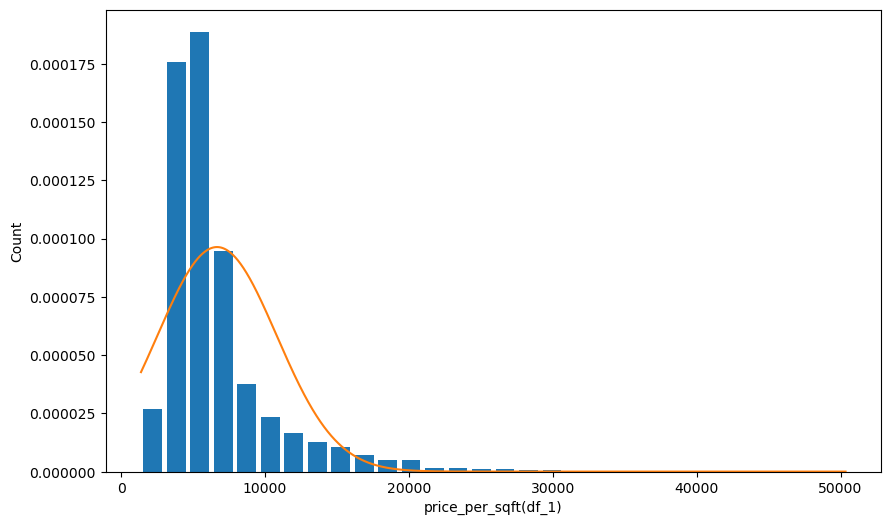

In [21]:
from scipy.stats import norm
import numpy as np
plt.hist(df_1['price_per_sqft'], bins=30, rwidth=0.8, density=True)
plt.xlabel('price_per_sqft(df_1)')
plt.ylabel('Count')

rng = np.arange(df_1['price_per_sqft'].min(), df_1['price_per_sqft'].max())
plt.plot(rng, norm.pdf(rng,df_1['price_per_sqft'].mean(),df_1['price_per_sqft'].std()))
plt.show()

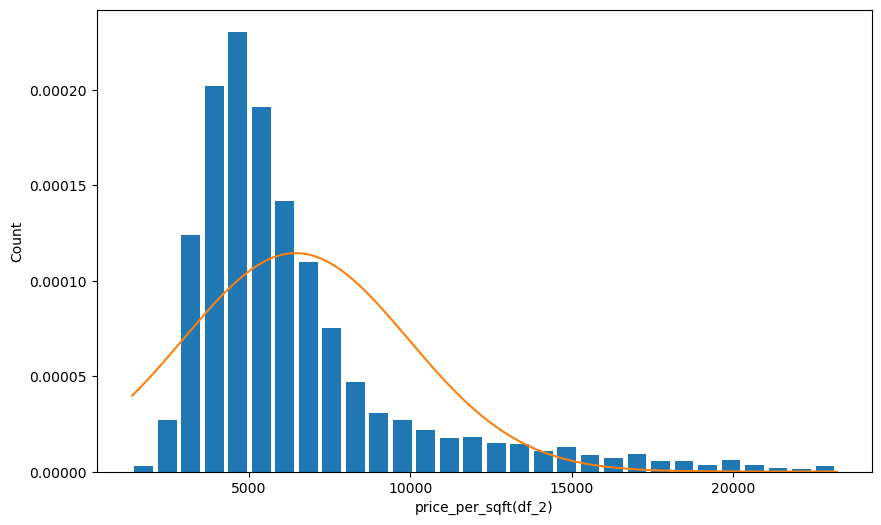

In [22]:
plt.hist(df_2['price_per_sqft'], bins=30, rwidth=0.8, density=True)
plt.xlabel('price_per_sqft(df_2)')
plt.ylabel('Count')

rng = np.arange(df_2['price_per_sqft'].min(), df_2['price_per_sqft'].max())
plt.plot(rng, norm.pdf(rng,df_2['price_per_sqft'].mean(),df_2['price_per_sqft'].std()))
plt.show()

Use of Z score

In [23]:
df_1['z_score']=(df['price_per_sqft']-df['price_per_sqft'].mean())/df_1['price_per_sqft'].std()
df_1

C:\Users\HP USER\AppData\Local\Temp\ipykernel_12960\868542398.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1['z_score']=(df['price_per_sqft']-df['price_per_sqft'].mean())/df_1['price_per_sqft'].std()


,location,size,total_sqft,bath,price,bhk,price_per_sqft,z_score
0,Electronic City Phase II,2 BHK,1056.0,2,39.07,2,3699,-1.019395
1,Chikka Tirupathi,4 Bedroom,2600.0,5,120.00,4,4615,-0.798194
2,Uttarahalli,3 BHK,1440.0,2,62.00,3,4305,-0.873054
3,Lingadheeranahalli,3 BHK,1521.0,3,95.00,3,6245,-0.404571
4,Kothanur,2 BHK,1200.0,2,51.00,2,4250,-0.886336
...,...,...,...,...,...,...,...,...
13195,Whitefield,5 Bedroom,3453.0,4,231.00,5,6689,-0.297351
13196,other,4 BHK,3600.0,5,400.00,4,11111,0.770502
13197,Raja Rajeshwari Nagar,2 BHK,1141.0,2,60.00,2,5258,-0.642918
13198,Padmanabhanagar,4 BHK,4689.0,4,488.00,4,10407,0.600495


In [24]:
df_3=df_1[(df_1['z_score']<=4) & (df_1['z_score']>=-4)]
df_3

,location,size,total_sqft,bath,price,bhk,price_per_sqft,z_score
0,Electronic City Phase II,2 BHK,1056.0,2,39.07,2,3699,-1.019395
1,Chikka Tirupathi,4 Bedroom,2600.0,5,120.00,4,4615,-0.798194
2,Uttarahalli,3 BHK,1440.0,2,62.00,3,4305,-0.873054
3,Lingadheeranahalli,3 BHK,1521.0,3,95.00,3,6245,-0.404571
4,Kothanur,2 BHK,1200.0,2,51.00,2,4250,-0.886336
...,...,...,...,...,...,...,...,...
13195,Whitefield,5 Bedroom,3453.0,4,231.00,5,6689,-0.297351
13196,other,4 BHK,3600.0,5,400.00,4,11111,0.770502
13197,Raja Rajeshwari Nagar,2 BHK,1141.0,2,60.00,2,5258,-0.642918
13198,Padmanabhanagar,4 BHK,4689.0,4,488.00,4,10407,0.600495


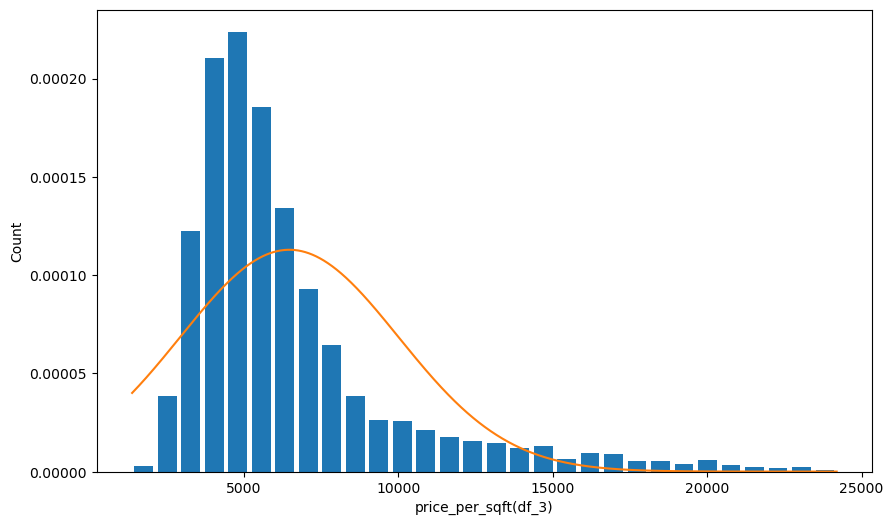

In [25]:
plt.hist(df_3['price_per_sqft'], bins=30, rwidth=0.8, density=True)
plt.xlabel('price_per_sqft(df_3)')
plt.ylabel('Count')

rng = np.arange(df_3['price_per_sqft'].min(), df_3['price_per_sqft'].max())
plt.plot(rng, norm.pdf(rng,df_3['price_per_sqft'].mean(),df_3['price_per_sqft'].std()))
plt.show()

So Percentile method and Z score method both are giving almost same plot in histogram. So it proves the equivalancy between these two plots

USE OF IQR TECHNIQUE (INTER QUATILE RANGE)

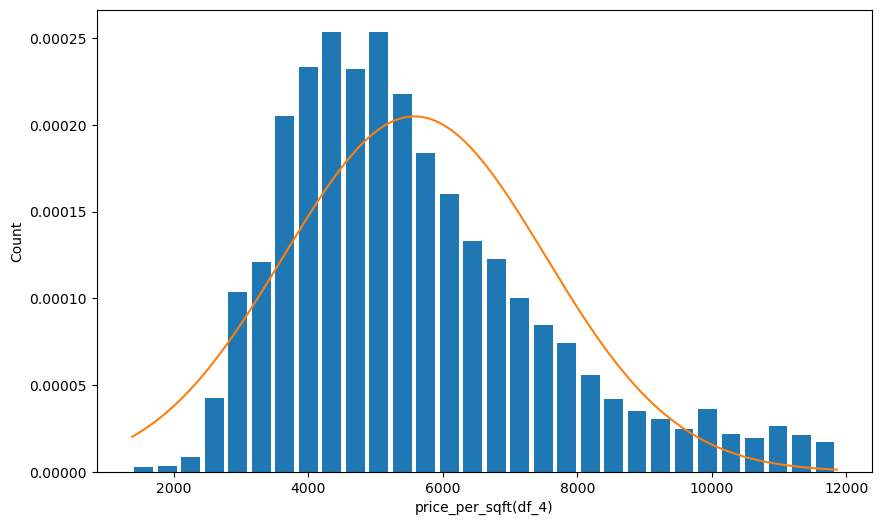

,location,size,total_sqft,bath,price,bhk,price_per_sqft,z_score
0,Electronic City Phase II,2 BHK,1056.0,2,39.07,2,3699,-1.019395
1,Chikka Tirupathi,4 Bedroom,2600.0,5,120.00,4,4615,-0.798194
2,Uttarahalli,3 BHK,1440.0,2,62.00,3,4305,-0.873054
3,Lingadheeranahalli,3 BHK,1521.0,3,95.00,3,6245,-0.404571
4,Kothanur,2 BHK,1200.0,2,51.00,2,4250,-0.886336
...,...,...,...,...,...,...,...,...
13195,Whitefield,5 Bedroom,3453.0,4,231.00,5,6689,-0.297351
13196,other,4 BHK,3600.0,5,400.00,4,11111,0.770502
13197,Raja Rajeshwari Nagar,2 BHK,1141.0,2,60.00,2,5258,-0.642918
13198,Padmanabhanagar,4 BHK,4689.0,4,488.00,4,10407,0.600495


In [26]:
Q1=df_1['price_per_sqft'].quantile(0.25)
Q3=df_1['price_per_sqft'].quantile(0.75)
IQR= Q3-Q1
lower_limit=Q1-(1.5*IQR)
upper_limit=Q3+(1.5*IQR)

df_4=df_1[(df_1['price_per_sqft']<=upper_limit)&(df_1['price_per_sqft']>=lower_limit)]

plt.hist(df_4['price_per_sqft'], bins=30, rwidth=0.8, density=True)
plt.xlabel('price_per_sqft(df_4)')
plt.ylabel('Count')

rng = np.arange(df_4['price_per_sqft'].min(), df_4['price_per_sqft'].max())
plt.plot(rng, norm.pdf(rng,df_4['price_per_sqft'].mean(),df_4['price_per_sqft'].std()))
plt.show()
df_4
